In [6]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open("../data/processed/ant_behavioral_train_test.pkl", "rb") as f:
    data = pickle.load(f)

X_train, X_test, y_train, y_test = data["X_train"], data["X_test"], data["y_train"], data["y_test"]

In [3]:
# Initialize model
rf = RandomForestRegressor(
    n_estimators=300,       # number of trees
    max_depth=None,         # let trees expand fully
    min_samples_leaf=5,     # prevents overfitting
    n_jobs=-1,              # use all CPU cores
    random_state=42
)

# Fit model
rf.fit(X_train, y_train)

# Predictions
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

# Evaluation metrics
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"Train R²: {r2_train:.3f}, RMSE: {rmse_train:.3f}")
print(f"Test  R²: {r2_test:.3f}, RMSE: {rmse_test:.3f}")

Train R²: 0.223, RMSE: 0.878
Test  R²: 0.186, RMSE: 0.909


,Feature,Importance
0,trial_type_Incongruent,0.449794
2,prev_trial_type_SpatialCue,0.259569
3,target_dir_Right,0.045263
1,prev_trial_type_NoCue,0.044830
4,target_pos_Up,0.044501
5,session_ses-2,0.038805
10,run_6,0.025771
8,run_4,0.024606
7,run_3,0.022936
9,run_5,0.022486


/var/folders/4p/rtytcsp11j70tn7dmwys7lrm0000gn/T/ipykernel_92720/3908197100.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="viridis")


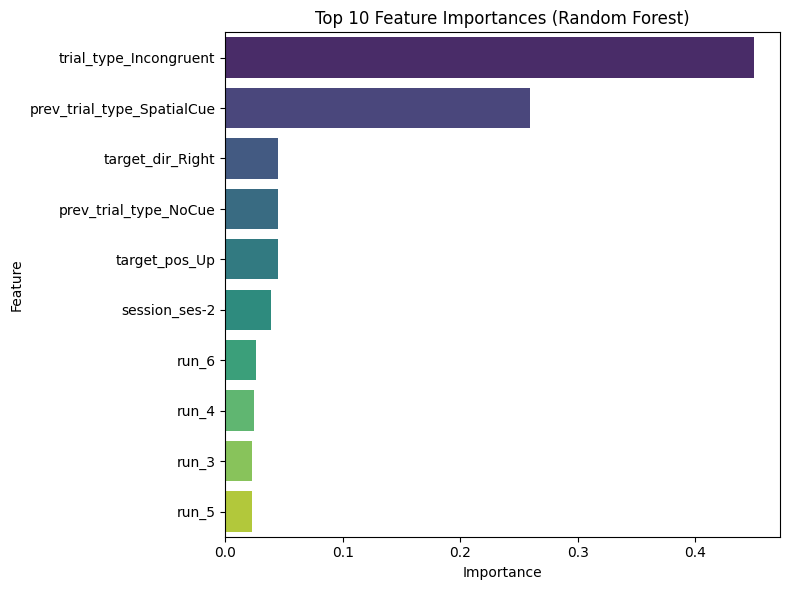

In [4]:
# Sort features by importance
feat_imp = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Show top 10
display(feat_imp.head(10))

# Plot
plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp.head(10), y="Feature", x="Importance", palette="viridis")
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

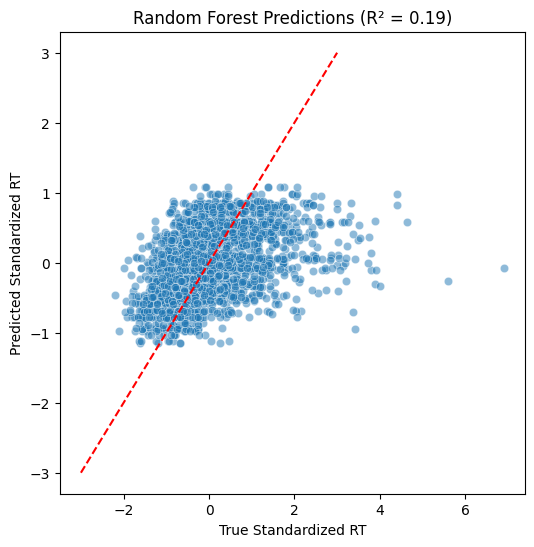

In [5]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.5)
plt.xlabel("True Standardized RT")
plt.ylabel("Predicted Standardized RT")
plt.title(f"Random Forest Predictions (R² = {r2_test:.2f})")
plt.plot([-3,3], [-3,3], "r--")
plt.show()

In [7]:
param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [3, 5, 10]
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_grid,
    cv=3,
    scoring="r2"
)
grid_rf.fit(X_train, y_train)

print("Best parameters:", grid_rf.best_params_)
print("Best CV R²:", grid_rf.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 400}
Best CV R²: 0.17648179941393918
